# Overview of approach used for detecting car crashes

We have been tasked with developing an application which can identify if an insurance claim contains a car accident displayed in a static image. If an accident is detected, the claim is forwarded to the correct claims processing department.  Let's start by learning how to use a YOLO model.  

Note:  YOLO stands for <I> 'You Only Look Once'.</I>

In this notebook we use a pre-trained machine learning model, YOLOv8m and explore how it works on static images. If it can detect a car then we can retrain the model to detect car accidents.  

To begin, we will install the ultralytics package for YOLO models and import some python packages:

In [1]:
! time pip install ultralytics
! pip install opencv-python-headless

import cv2
from ultralytics import YOLO
from PIL import Image


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

real	0m2.861s
user	0m2.720s
sys	0m0.100s

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
#use the YOLOv8m model for object detection
model = YOLO('yolov8m.pt')

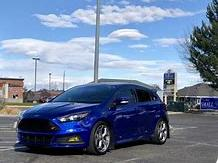

In [3]:
#display the image we wish to test
Image.open("images/carImage0.jpg")

We discover that YOLO has determined that there is '1 car' in the provided photo.  This is great news for us.  We can test out a few more photos to make certain YOLO is detecting car objects.  Then we can write some code to provide 'boxes' around the car YOLO detected for us.

In [4]:
! cd images ; #change into our <images> folder

In [5]:
!ls -al images #list all the images in our <images> folder.  Pick one of the images to test.

total 84
drwxr-sr-x. 3 1003670000 1003670000  4096 Jan  2 21:23 .
drwxr-sr-x. 5 1003670000 1003670000  4096 Jan  2 22:14 ..
-rw-r--r--. 1 1003670000 1003670000  9484 Jan  2 20:25 carImage0.jpg
-rw-r--r--. 1 1003670000 1003670000 17581 Jan  2 20:25 carImage1.jpg
-rw-r--r--. 1 1003670000 1003670000 23268 Jan  2 20:25 carImage2.jpg
-rw-r--r--. 1 1003670000 1003670000 14795 Jan  2 20:25 carImage3.jpg
drwxr-sr-x. 2 1003670000 1003670000  4096 Jan  2 21:23 .ipynb_checkpoints


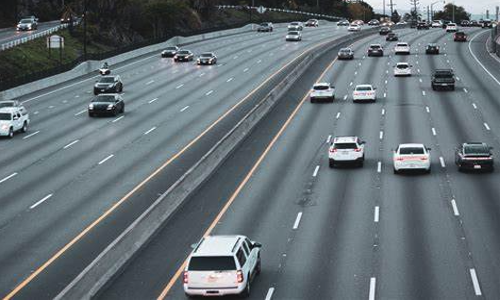

In [13]:
#choose a car image eg <carImage3.jpg> and determine if yolo can determine if the image is an automobile
img = Image.open('images/carImage4.jpg')
img_resized = img.resize((500, 300))
display(img_resized)

In [14]:
#obtain the results for the model prediction
results = model.predict("images/carImage4.jpg")


image 1/1 /opt/app-root/src/insurance-claim-processing/lab-materials/04/images/carImage4.jpg: 448x640 17 cars, 1 truck, 197.1ms
Speed: 1.4ms preprocess, 197.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


If we look at the results for <carImage4.jpg>, we see that yolo has determined that there are 17 cars and 1 truck.  This result is interesting.  We can confirm that the yolo model can identify multiple 'cars' in an image that contains multiple vehicles.  However; with so many vehicles displayed in the image, it may now be difficult for us 'the humans', to accurately count all of the vehicles!  

Therefore let's write some code that will place 'boxes' around the 'cars' that the yolo model identifies within an image.  <B>Please go to notebook '04-02-car-recog.ipynb'</B>